# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
from dateutil.tz import tzutc, tzlocal

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
with open("samplecity.txt", "w") as outfile:
    for city in cities:
        outfile.writelines(city+"\n")
    
            

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units="metric"
# Define an empty list to fetch the weather data for each city
city_data = []
api_keys = weather_api_key
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  (f"{url}q={city}&units={units}&APPID={api_keys}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        print(city_url)
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = pd.to_datetime(city_weather["dt"], unit='s')
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
https://api.openweathermap.org/data/2.5/weather?q=port alfred&units=metric&APPID=79c48b30d8b15778cb3a0b16bca10522
Processing Record 2 of Set 1 | punta arenas
https://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=metric&APPID=79c48b30d8b15778cb3a0b16bca10522
Processing Record 3 of Set 1 | hobart
https://api.openweathermap.org/data/2.5/weather?q=hobart&units=metric&APPID=79c48b30d8b15778cb3a0b16bca10522
Processing Record 4 of Set 1 | mahebourg
https://api.openweathermap.org/data/2.5/weather?q=mahebourg&units=metric&APPID=79c48b30d8b15778cb3a0b16bca10522
Processing Record 5 of Set 1 | tual
https://api.openweathermap.org/data/2.5/weather?q=tual&units=metric&APPID=79c48b30d8b15778cb3a0b16bca10522
Processing Record 6 of Set 1 | mar del plata
https://api.openweathermap.org/data/2.5/weather?q=mar del plata&units=metric&APPID=79c48b30d8b15778cb3a0b16bca10522
Processing Record 7 

In [5]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,24.54,88,36,5.66,ZA,2023-01-23 22:18:24
1,punta arenas,-53.1500,-70.9167,15.06,41,20,12.35,CL,2023-01-23 22:18:27
2,hobart,-42.8794,147.3294,20.14,79,20,2.57,AU,2023-01-23 22:18:32
3,mahebourg,-20.4081,57.7000,24.03,88,75,1.54,MU,2023-01-23 22:18:34
4,tual,-5.6667,132.7500,27.93,77,100,6.78,ID,2023-01-23 22:18:35


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,24.54,88,36,5.66,ZA,2023-01-23 22:18:24
1,punta arenas,-53.1500,-70.9167,15.06,41,20,12.35,CL,2023-01-23 22:18:27
2,hobart,-42.8794,147.3294,20.14,79,20,2.57,AU,2023-01-23 22:18:32
3,mahebourg,-20.4081,57.7000,24.03,88,75,1.54,MU,2023-01-23 22:18:34
4,tual,-5.6667,132.7500,27.93,77,100,6.78,ID,2023-01-23 22:18:35


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

line equation : y = -0.44x + 17.81


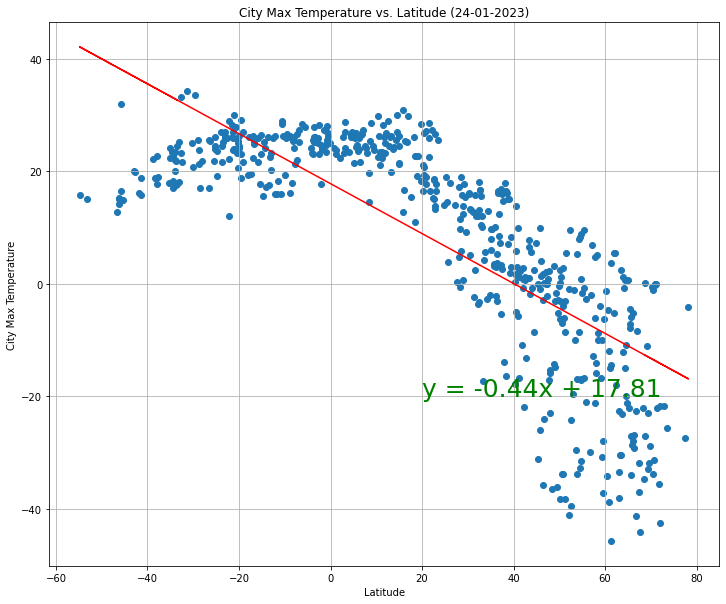

<Figure size 432x288 with 0 Axes>

In [29]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(12,10))
markersize=12
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line equation : {line_eq}")
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.annotate(line_eq,(20,-20),fontsize=25,color="green")
plt.ylabel('City Max Temperature')
plt.xlabel('Latitude')
todaydate = time.strftime("%d-%m-%Y")
plt.title(f"City Max Temperature vs. Latitude ({todaydate})")
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.show()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

line equation : y = 0.1x + 73.62


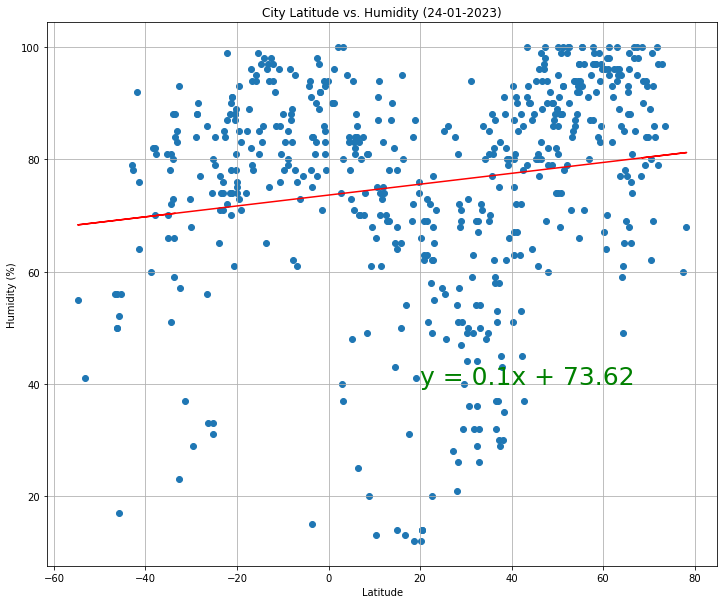

<Figure size 432x288 with 0 Axes>

In [30]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(12,10))
markersize=12
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line equation : {line_eq}")
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.annotate(line_eq,(20,40),fontsize=25,color="green")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
todaydate = time.strftime("%d-%m-%Y")
plt.title(f"City Latitude vs. Humidity ({todaydate})")
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

line equation : y = 0.14x + 56.61


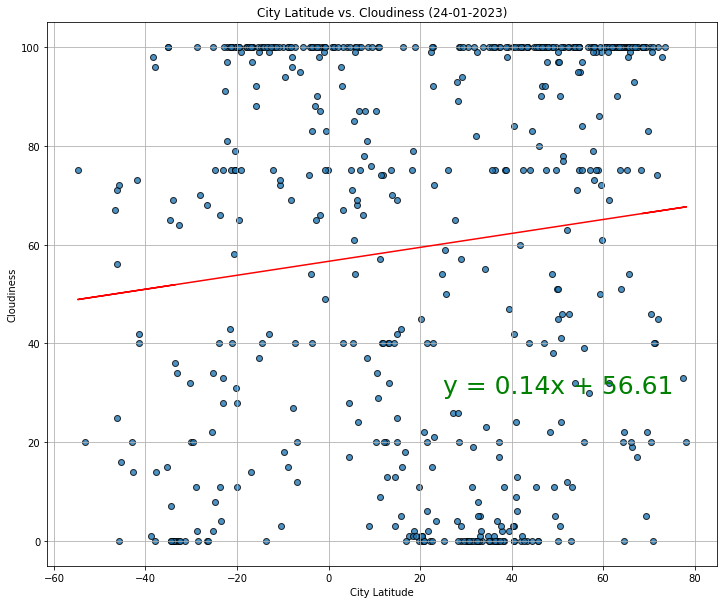

<Figure size 432x288 with 0 Axes>

In [31]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(12,10))
markersize=12
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line equation : {line_eq}")
#print(f"r- {regress_values}")
plt.scatter(x_values,y_values,edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.annotate(line_eq,(25,30),fontsize=25,color="green")
plt.ylabel('Cloudiness')
plt.xlabel('City Latitude')
todaydate = time.strftime("%d-%m-%Y")
plt.title(f"City Latitude vs. Cloudiness ({todaydate})")
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

line equation : y = 0.0x + 3.54


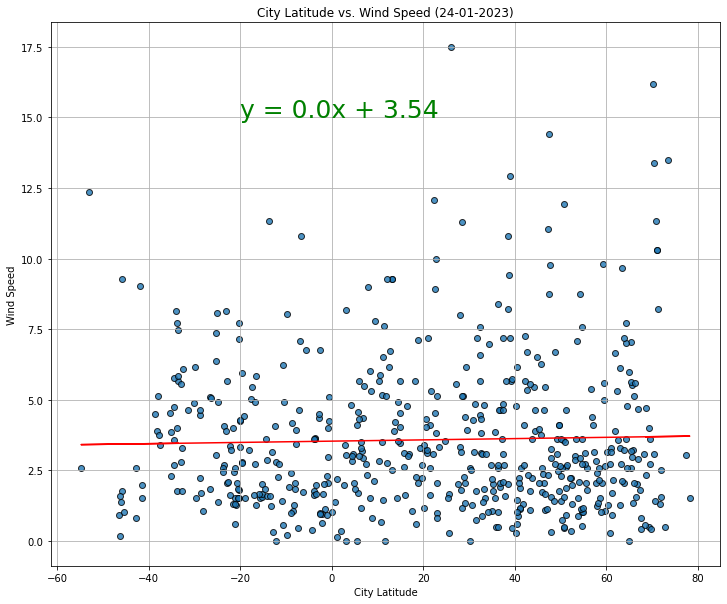

<Figure size 432x288 with 0 Axes>

In [32]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(12,10))
markersize=12
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line equation : {line_eq}")
#print(f"r- {regress_values}")
plt.scatter(x_values,y_values,edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.annotate(line_eq,(-20,15),fontsize=25,color="green")
plt.ylabel('Wind Speed')
plt.xlabel('City Latitude')
todaydate = time.strftime("%d-%m-%Y")
plt.title(f"City Latitude vs. Wind Speed ({todaydate})")
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def createScatterPlot(xvalues, yvalues,xlabel, ylabel, title,figurename):
    
    fig1, ax1 = plt.subplots(figsize=(12,10))
    markersize=12
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"line equation : {line_eq}")
    plt.scatter(xvalues,yvalues)

    # Incorporate the other graph properties
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    todaydate = time.strftime("%d-%m-%Y")
    plt.title(f"{title}")
    plt.plot(xvalues,regress_values,"r-")
    plt.grid()
    print(f"The r-value is: {rvalue**2}")
    #plt.show()
    
    # Save the figure
    plt.savefig(f"output_data/{figurename}")

    # Show plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,trincomalee,8.5711,81.2335,25.35,81,100,5.30,LK,2023-01-23 22:18:38
7,puri,19.8000,85.8500,18.29,74,11,2.23,IN,2023-01-23 22:18:40
8,hilo,19.7297,-155.0900,28.49,76,0,2.68,US,2023-01-23 22:18:41
10,upernavik,72.7868,-56.1549,-21.79,97,98,0.49,GL,2023-01-23 22:18:44
11,sao filipe,14.8961,-24.4956,21.57,64,25,4.54,CV,2023-01-23 22:18:45


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,24.54,88,36,5.66,ZA,2023-01-23 22:18:24
1,punta arenas,-53.1500,-70.9167,15.06,41,20,12.35,CL,2023-01-23 22:18:27
2,hobart,-42.8794,147.3294,20.14,79,20,2.57,AU,2023-01-23 22:18:32
3,mahebourg,-20.4081,57.7000,24.03,88,75,1.54,MU,2023-01-23 22:18:34
4,tual,-5.6667,132.7500,27.93,77,100,6.78,ID,2023-01-23 22:18:35


###  Temperature vs. Latitude Linear Regression Plot

line equation : y = -0.79x + 32.86
The r-value is: 0.677345666273764


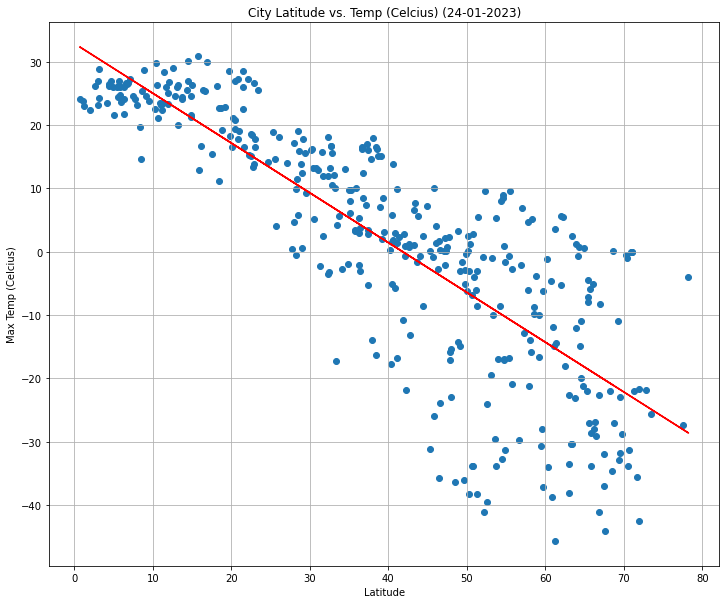

The coorelation between northern hemisphere Latitude and Max temp is -0.82


In [35]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
ylabel ='Max Temp (Celcius)'
xlabel='Latitude'
todaydate = time.strftime("%d-%m-%Y")
ctitle = f"City Latitude vs. Temp (Celcius) ({todaydate})"
figurename = "FigTempLinearNorthernHemisphere1.png"
createScatterPlot(x_values,y_values,xlabel,ylabel,ctitle,figurename)
print(f"The coorelation between northern hemisphere Latitude and Max temp is {round(st.pearsonr(x_values,y_values)[0],2)}")


line equation : y = 0.13x + 25.77
The r-value is: 0.1590394464998744


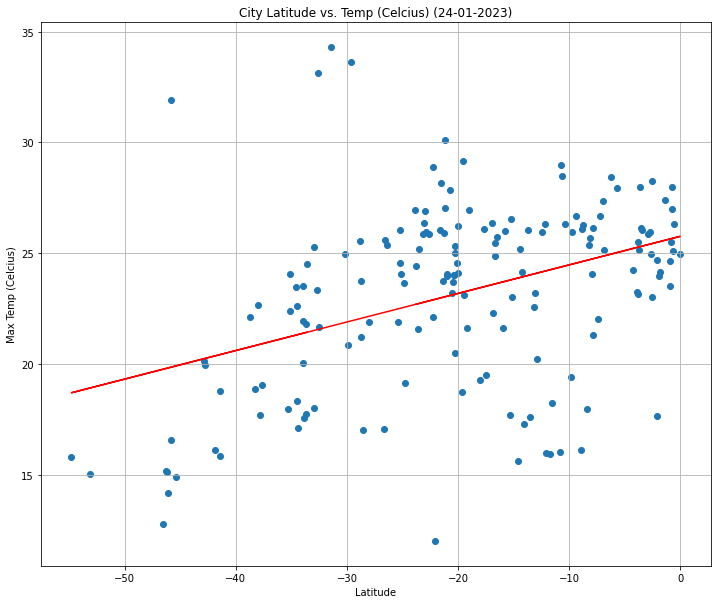

The coorelation between southern hemisphere Latitude and Max temp is 0.4


In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
ylabel ='Max Temp (Celcius)'
xlabel='Latitude'
todaydate = time.strftime("%d-%m-%Y")
ctitle = f"City Latitude vs. Temp (Celcius) ({todaydate})"
figurename = "FigTempLinearSouthernHemisphere1.png"
createScatterPlot(x_values,y_values,xlabel,ylabel,ctitle,figurename)
print(f"The coorelation between southern hemisphere Latitude and Max temp is {round(st.pearsonr(x_values,y_values)[0],2)}")



**Discussion about the linear relationship:** 
Southern Hemisphere - This is a very weak corelation between Max Temp and Latitude. There needs to be other factors which should also taken into consideration to make a meaningful relation. 
Northern Hemisphere - This is a weak corelation between Max Temp and Latitude. There needs to be other factors which should also taken into consideration to make a meaningful relation
Northern Hemisphere has a better coorelation than Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

line equation : y = 0.42x + 58.27
The r-value is: 0.16310523729758253


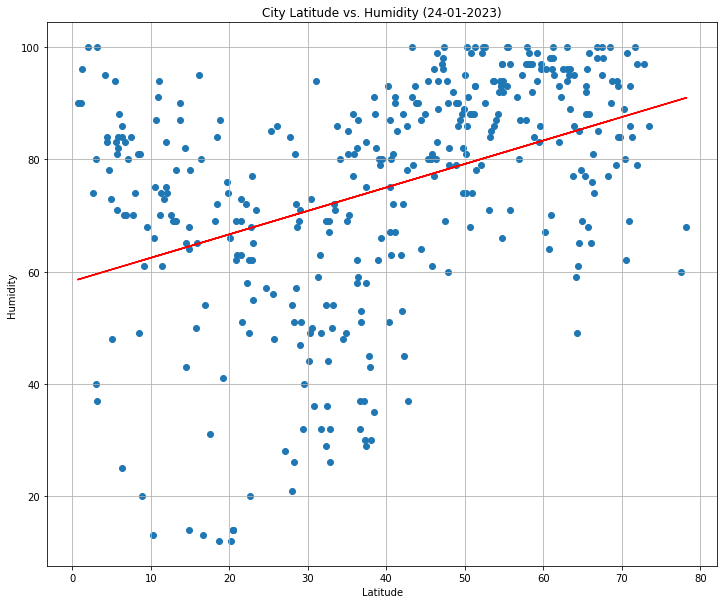

The coorelation between northern hemisphere Latitude and Humidity is 0.4


In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
ylabel ='Humidity'
xlabel='Latitude'
todaydate = time.strftime("%d-%m-%Y")
ctitle = f"City Latitude vs. Humidity ({todaydate})"
figurename = "FigTempLinearNorthernHemisphere2.png"
createScatterPlot(x_values,y_values,xlabel,ylabel,ctitle,figurename)
print(f"The coorelation between northern hemisphere Latitude and Humidity is {round(st.pearsonr(x_values,y_values)[0],2)}")


line equation : y = 0.57x + 89.44
The r-value is: 0.2060648208067203


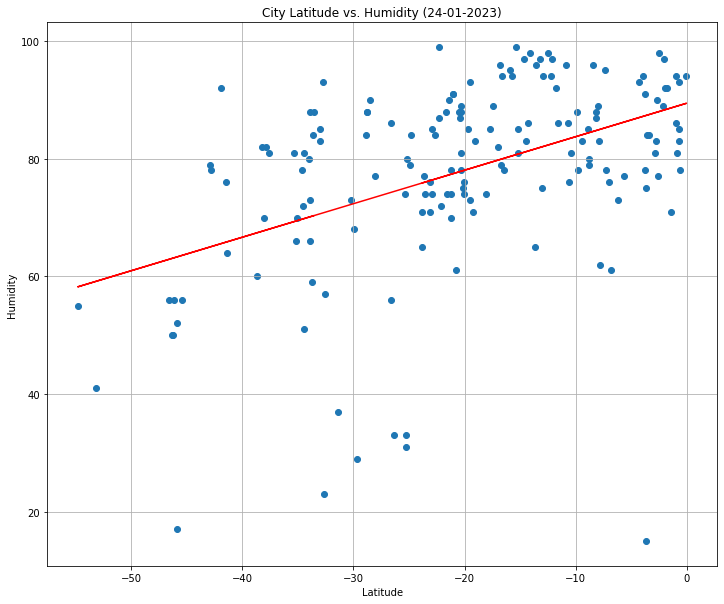

The coorelation between southern hemisphere Latitude and Humidity is 0.45


In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
ylabel ='Humidity'
xlabel='Latitude'
todaydate = time.strftime("%d-%m-%Y")
ctitle = f"City Latitude vs. Humidity ({todaydate})"
figurename = "FigTempLinearSouthernHemisphere2.png"
createScatterPlot(x_values,y_values,xlabel,ylabel,ctitle,figurename)
print(f"The coorelation between southern hemisphere Latitude and Humidity is {round(st.pearsonr(x_values,y_values)[0],2)}")


**Discussion about the linear relationship:** 
Southern Hemisphere - This is a very weak corelation between Humidity and Latitude. There needs to be other factors which should also taken into consideration to make a meaningful relation.
Northern Hemisphere - This is a very weak corelation between Humidity and Latitude. There needs to be other factors which should also taken into consideration to make a meaningful relation.

### Cloudiness vs. Latitude Linear Regression Plot

line equation : y = 0.49x + 39.08
The r-value is: 0.05913938947374379


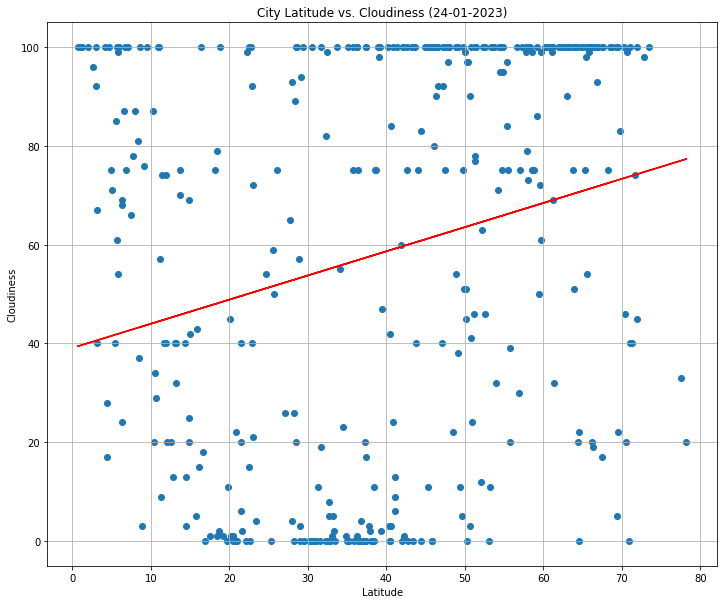

The coorelation between northern hemisphere Latitude and Cloudiness is 0.24


In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
ylabel ='Cloudiness'
xlabel='Latitude'
todaydate = time.strftime("%d-%m-%Y")
ctitle = f"City Latitude vs. Cloudiness ({todaydate})"
figurename = "FigTempLinearNorthernHemisphere3.png"
createScatterPlot(x_values,y_values,xlabel,ylabel,ctitle,figurename)
print(f"The coorelation between northern hemisphere Latitude and Cloudiness is {round(st.pearsonr(x_values,y_values)[0],2)}")


line equation : y = 1.38x + 90.48
The r-value is: 0.22335283284446913


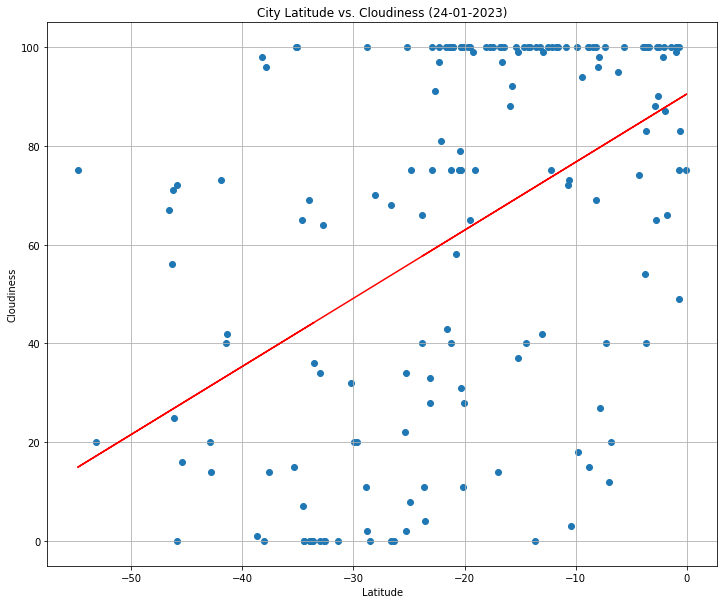

The coorelation between Southern hemisphere Latitude and Cloudiness is 0.47


In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
ylabel ='Cloudiness'
xlabel='Latitude'
todaydate = time.strftime("%d-%m-%Y")
ctitle = f"City Latitude vs. Cloudiness ({todaydate})"
figurename = "FigTempLinearSouthernHemisphere3.png"
createScatterPlot(x_values,y_values,xlabel,ylabel,ctitle,figurename)
print(f"The coorelation between Southern hemisphere Latitude and Cloudiness is {round(st.pearsonr(x_values,y_values)[0],2)}")


**Discussion about the linear relationship:** 
This is a very weak corelation between Humidity and Latitude. There needs to be other factors which should also taken into consideration to make a meaningful relation.
Northern Hemisphere - This is a very weak corelation between Humidity and Latitude. There needs to be other factors which should also taken into consideration to make a meaningful relation.

### Wind Speed vs. Latitude Linear Regression Plot

line equation : y = 0.0x + 3.68
The r-value is: 2.7086964763228747e-07


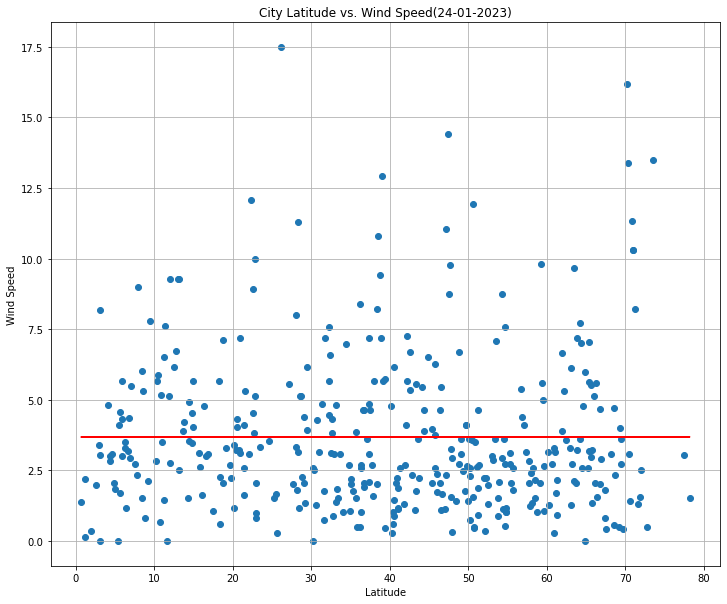

The coorelation between northern hemisphere Latitude and Wind Speed is 0.0


In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
ylabel ='Wind Speed'
xlabel='Latitude'
todaydate = time.strftime("%d-%m-%Y")
ctitle = f"City Latitude vs. Wind Speed({todaydate})"
figurename = "FigTempLinearNorthernHemisphere4.png"
createScatterPlot(x_values,y_values,xlabel,ylabel,ctitle,figurename)
print(f"The coorelation between northern hemisphere Latitude and Wind Speed is {round(st.pearsonr(x_values,y_values)[0],2)}")


line equation : y = -0.03x + 2.66
The r-value is: 0.03681445259299304


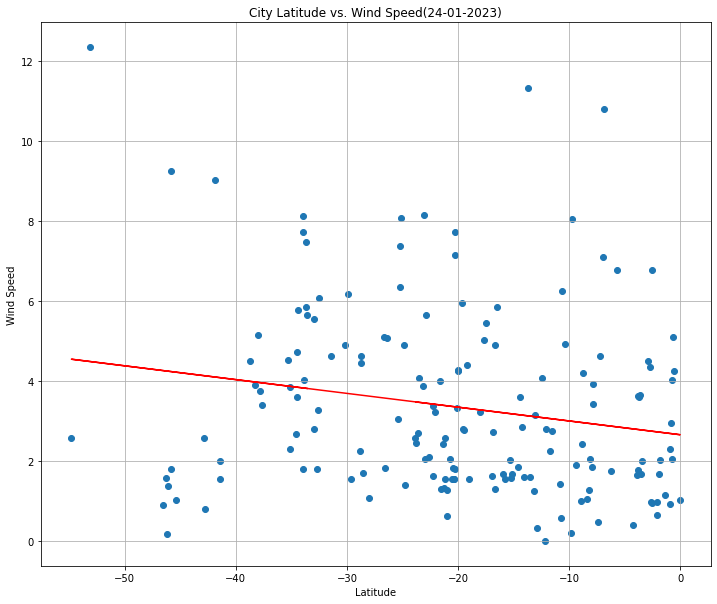

The coorelation between Southern hemisphere Latitude and Wind Speed is -0.19


In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
ylabel ='Wind Speed'
xlabel='Latitude'
todaydate = time.strftime("%d-%m-%Y")
ctitle = f"City Latitude vs. Wind Speed({todaydate})"
figurename = "FigTempLinearSouthernHemisphere4.png"
createScatterPlot(x_values,y_values,xlabel,ylabel,ctitle,figurename)
print(f"The coorelation between Southern hemisphere Latitude and Wind Speed is {round(st.pearsonr(x_values,y_values)[0],2)}")


**Discussion about the linear relationship:** 
Southern Hemisphere - This is a very weak corelation between Weed Speed and Latitude. There needs to be other factors which should also taken into consideration to make a meaningful relation.
Northern Hemisphere - This is a no corelation between Weed Speed and Latitude. There needs to be other factors which should also taken into consideration to make a meaningful relation.